In [1]:
import json
import re
from dataclasses import dataclass

import pandas as pd

In [2]:
with open("../data/POS_LC.json", "r") as f:
    data = json.load(f)

In [3]:
with open("../data/examples.txt", "r") as f:
    examples = f.readlines()

In [4]:
@dataclass
class Molecule:
    pepmass: float = None
    charge: str = ""
    mslevel: int = None
    feature_id: int = None
    source_instrument: str = ""
    ionmode: str = ""
    name: str = ""
    pi: str = ""
    datacollector: str = ""
    taxonomy: str = ""
    smiles: str = ""
    pubchem: str = ""
    spectrum: pd.DataFrame = None

    def __str__(self):
        return f"""
pepmass={self.pepmass}
charge={self.charge}
mslevel={self.mslevel}
feature_id={self.feature_id}
source_instrument={self.source_instrument}
ionmode={self.ionmode}
name={self.name}
pi={self.pi}
datacollector={self.datacollector}
taxonomy={self.taxonomy}
smiles={self.smiles}
pubchem={self.pubchem}
spectrum=\n{self.spectrum}
"""
    def __repr__(self):
        return self.__str__()

types = dict(
    pepmass=float,
    mslevel=int,
    feature_id=int
)

In [6]:
molecules = []
for current_position, current_item in enumerate(examples):
    if "BEGIN IONS" in current_item:
        spectrum = []
        mol = Molecule()

        for next_position, next_item in enumerate(examples[current_position+1:]):
            if "END IONS" in next_item:
                break            
            
            if "\t" in next_item:
                val1, val2, _ = next_item.split("\t")
                spectrum.append((float(val1), float(val2)))
            else:
                key, val = next_item.split("=")

                val = val.replace("\n", "")
                key = key.lower()

                if key in types:
                    if not val:
                        val = None
                    else:
                        val = types[key](val)
                setattr(mol, key, val)

        setattr(mol, "spectrum", pd.DataFrame(spectrum, columns=["mass-to-charge", "intensity"]))
        molecules.append(mol)


In [66]:
molecules

[
 pepmass=496.34
 charge=1+
 mslevel=2
 feature_id=1
 source_instrument=Banyuls_QExactive_Focus
 ionmode=***
 name=Cmpd-5_publi_2_corail
 pi=Didier Stien
 datacollector=Didier Stien
 taxonomy=Pocillo
 smiles=***
 pubchem=***
 spectrum=
     mass-to-charge   intensity
 0       121.251839    0.668298
 1       125.000038   10.716405
 2       146.762100    0.728083
 3       184.073715  100.000000
 4       270.395264    0.732708
 5       313.275238    3.312709
 6       319.911499    0.645011
 7       478.330139    9.536627
 8       496.265503    1.355096
 9       496.340790   76.367104
 10      496.416077    1.408563
 11      521.276733    0.769850,
 
 pepmass=502.2929
 charge=1+
 mslevel=2
 feature_id=2
 source_instrument=Banyuls_QExactive_Focus
 ionmode=***
 name=Cmpd-8_publi_2_corail
 pi=Didier Stien
 datacollector=Didier Stien
 taxonomy=Pocillo
 smiles=***
 pubchem=***
 spectrum=
     mass-to-charge   intensity
 0        53.002407    0.894766
 1        53.038887    1.019218
 2        5

In [61]:
baseline = molecules[0].spectrum

In [ ]:
def plot_ms(spectrum, normalize=False, xlim=None, ax=None):
    if not ax:
        fig, ax = plt.subplots(1)

    factor = 1
    if normalize:
        factor = spectrum["intensity"].max()

    for _, (mz, intensity) in spectrum.iterrows():
        ax.plot([mz, mz], [0, intensity/factor], "k-")
        ax.plot(mz, intensity/factor, "ko")
    
    if xlim:
        ax.set_xlim(xlim)

    return ax

# Full dataset

In [ ]:
name = "2-Cyano-3,3-diphenylacrylic acid"
sample = [item for item in data if item.get("NAME") == name]
print(f"Found {len(sample)} items")

Found 0 items


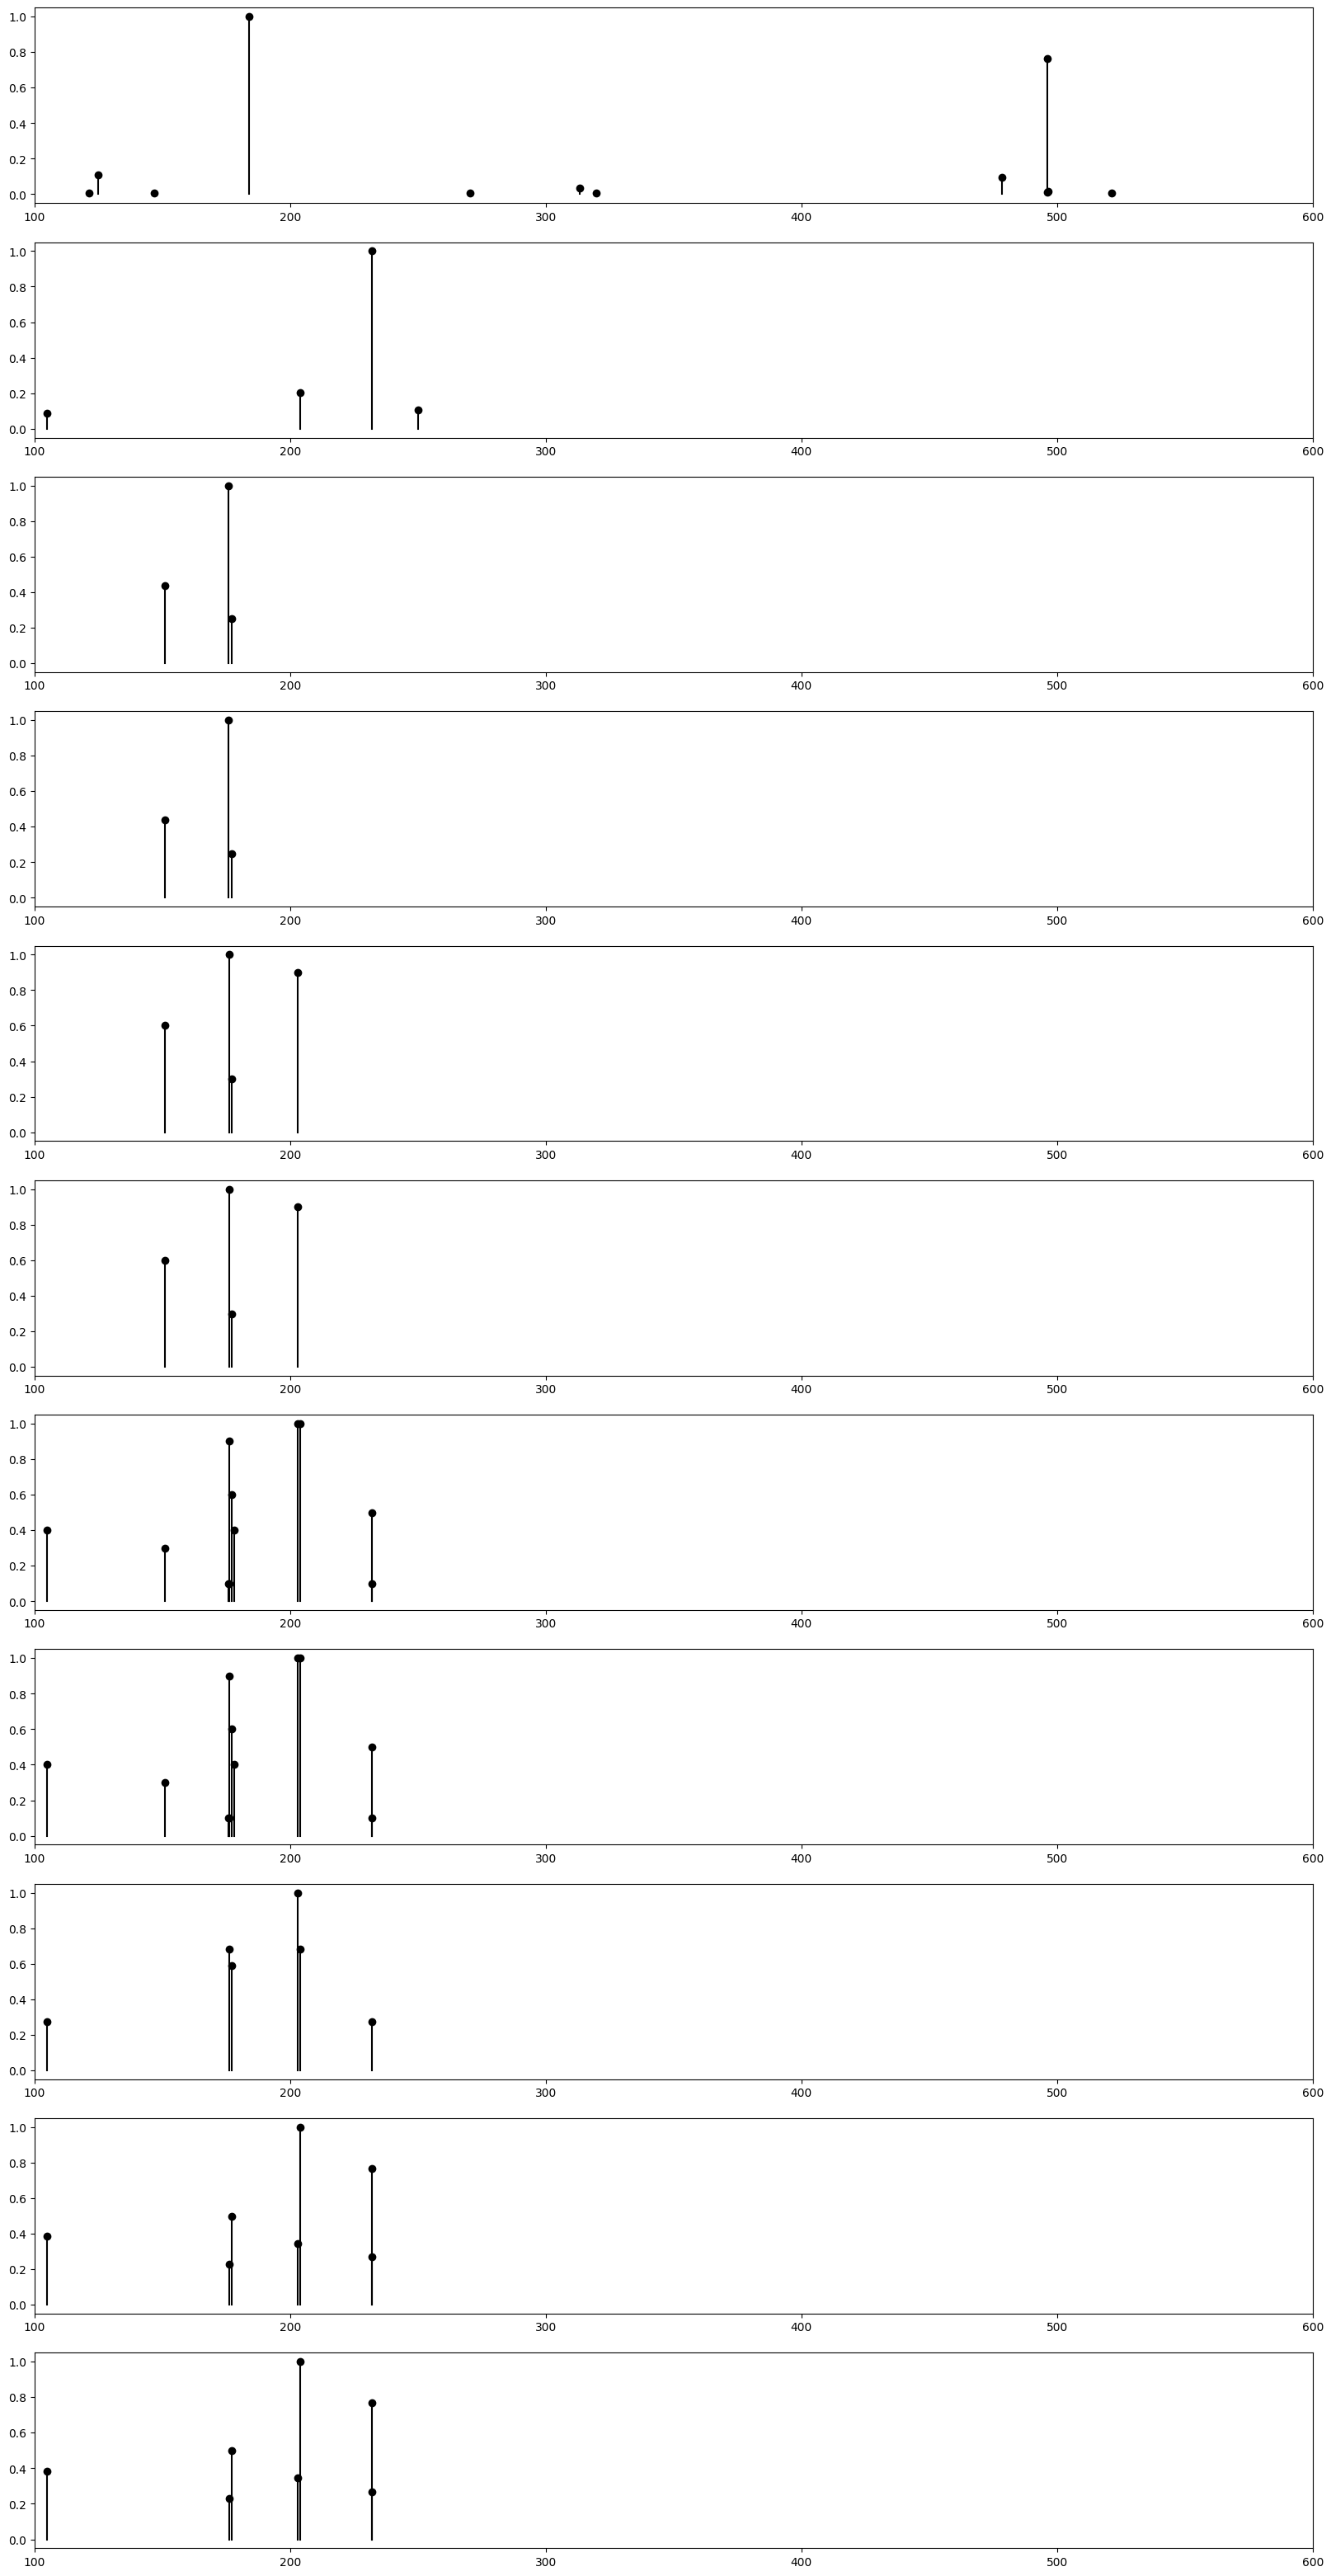

In [65]:
fig, axes = plt.subplots(len(sample)+1, 1, figsize=(20, 40))
plot_ms(baseline, True, xlim=(100, 600), ax=axes[0])
for pos, test_case in enumerate(sample):
    peaks = pd.DataFrame([item.split(" ") for item in test_case.get("PEAKS_LIST").split(";")], columns=["mass-to-charge", "intensity"]).astype(float)
    plot_ms(peaks, xlim=(100, 600), ax=axes[pos+1])